## Método del descenso del gradiente

### Presenta: Carlos Alberto Rábago Figueroa

Materia: Matematicas para Ciencia de datos

### El modo de funcionamiento básico del método del descenso del gradiente es:

1.-Inicializar los parámetros θ a un valor de inicio

2.-Indicar la velocidad de aprendizaje del algoritmo (α)

3.-Obtener la derivada de J en el punto θ

4.-Sustraer la derivada por la velocidad de aprendizaje al valor actual del parámetro

5.-Actualizar el valor de θ el nuevo valor

6.-Comprobar el cambio en la actualización de los parámetros es inferior a un fijado previamente (llamada criterio de parada).

7.-En caso afirmativo finalizar la ejecución, en caso contrario volver al punto 3.

La variable X hace referencia a la caracteristica Kgs_PB y la Y hace referencia a Kgs_TCV1, la cuales pertenecen al archivo 
BDCarnes.csv, los cuales se registraron de octubre a noviembre del presente.

Kgs_PB registra los pesos de la piezas base de cada tipo carne
Kgs_TCV1 registra los pesos de los tipos cortes de cada tipo carne.

El presente estudio se baso en parte a:

- 4-DGCA-F02 Registro del Proceso de Cortes en el área de Carnicería (Extracto: Bd_Carniceria.csv), Autor Carlos Rábago 
- Linear Regression using Gradient Descent, https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- SVD using gradient descent, https://github.com/v-iashin/SVD

### Implementación del modelo

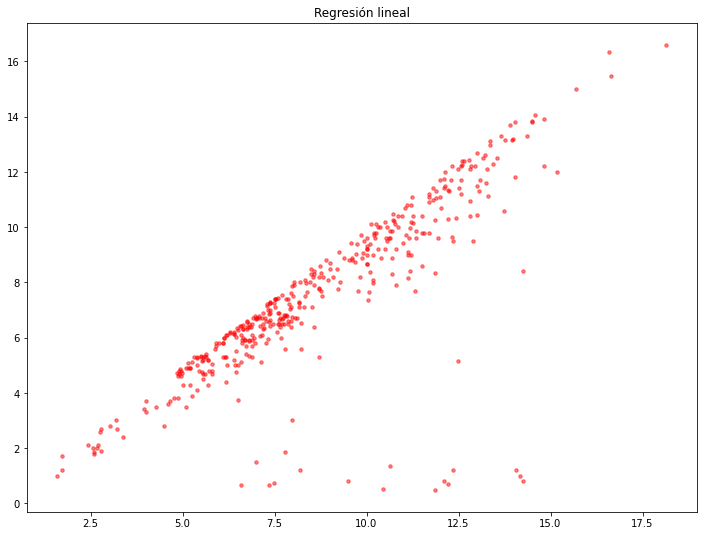

In [2]:
# Importando Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Procesamiento previo de datos de entrada
data = pd.read_csv('BDCarnes.csv')
plt.title('Regresión lineal')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y, s=12,c="r", alpha=0.5)
plt.show()

## El descenso degradiente
El descenso de gradiente es un algoritmo de optimización iterativo para encontrar el mínimo de una función. 
Aquí esa función es nuestra función de pérdida.

In [3]:
# Construyendo el modelo
m = 0
c = 0

L = 0.0001  #  tasa de aprendizaje
epochs = 1000  # número de iteraciones para realizar el descenso de gradiente

n = float(len(X)) # Número de elementos en X

# Realización de descenso en gradiente 
for i in range(epochs): 
    Y_pred = m*X + c  #El valor predicho actual de Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivar wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivar wrt c
    m = m - L * D_m  # Actualizar m
    c = c - L * D_c  # Actualizar c
    
print (m, c)

0.8455225396842184 0.09188473239276795


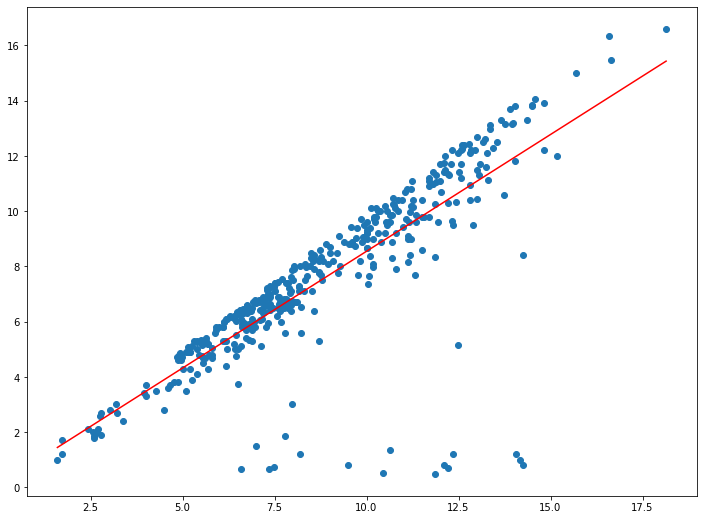

In [4]:
# Haciendo predicciones
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predictivo
plt.show()

## SVD usando descenso de gradiente

In [5]:
# Definiendo función SVD usando metodo de descendo de gradiente y retornando matriz de valores

def SVD(mat, initial_mat1, initial_mat2, learn_rate, iterations):

    ## reasignar valores para mantener el código limpio
    # matriz m por n que queremos aproximar
    A = mat

    # dos matrices de las que partiremos: B es m por k
    B = initial_mat1

    # C es n por k
    C = initial_mat2

    # tasa de aprendizaje
    alpha = learn_rate
    
    # número de iteraciones
    N = iterations
    
    # A ~ B * C^t : la primera aproximación basada en matrices iniciales dadas
    A_app = np.dot(B, C.T)

    # Realización de descenso en gradiente 
    for i in range(N):
        # derivadas parciales para matrices
        dLdB = np.dot((A_app - A), C)
        dLdC = np.dot((A_app - A).T, B)
        # actualizando matrices
        C = C - alpha * dLdC
        B = B - alpha * dLdB
        # calculando matriz aproximada
        A_app = np.dot(B, C.T)

    # devolviendo dos matrices que se pueden usar para una aproximación
    return B, C, A_app

In [16]:
# la función SVD toma parámetros como:

# tasa de aprendizaje
alpha = 0.001

#  número de iteraciones para realizar el descenso de gradiente
N = 1000

# la matriz m por n que queremos aproximar
A = np.array([[-5, 1], [4, 7], [2, 8],[6, 8],[-2, 7],[2, 8],[6, 8],[-2, 7]])

# y un par de matrices: B es m por k
B = np.array([[3, 6], [-4, 5], [-5, 7],[8, 8],[4, 2],[2, 8],[6, 8],[-2, 7]])

# y C es n por k
C = np.array([[2, 3], [-4, 6]])

# devuelve B, C y A aproximados actualizados que son multiplicaciones de B y C
SVD(mat = A, initial_mat1 = B, initial_mat2 = C, learn_rate = alpha, iterations = N)

(array([[ 3.0173584 ,  1.34794151],
        [-3.20099256,  5.37272595],
        [-4.09893368,  5.87406225],
        [ 7.978857  ,  8.64582501],
        [ 2.49489462,  4.7418681 ],
        [ 2.23061074,  7.06373874],
        [ 6.2258628 ,  8.36628285],
        [-1.79376441,  4.9596363 ]]),
 array([[ 0.09227077,  0.37081926],
        [-0.26561975,  1.21760437]]),
 array([[0.77825666, 0.83978948],
        [1.6969522 , 7.39210144],
        [1.80000363, 8.2410416 ],
        [3.9422537 , 8.40785228],
        [1.98858186, 5.11102603],
        [2.82519053, 8.00834488],
        [3.67684396, 8.53311041],
        [1.67361662, 6.51533408]]))